#Import datasets

In [17]:
import shutil
shutil.copyfile('/content/drive/MyDrive/NLP/IMDB Dataset.csv','/content/IMDB_Dataset.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/IMDBar.csv','/content/IMDBar.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/preprocessed_english.csv','/content/preprocessed_english.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/preprocessed_arabic.csv','/content/preprocessed_arabic.csv')
shutil.copyfile('/content/drive/MyDrive/NLP/dataset.csv','/content/dataset.csv')

'/content/dataset.csv'

#Imports

In [3]:
import pandas as pd
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.isri import ISRIStemmer

import re
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install langid
import langid


!pip install --upgrade keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Read Datasets

In [8]:
df1 = pd.read_csv('/content/IMDB_Dataset.csv')
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
df2 = pd.read_csv('/content/IMDBar.csv')
df2

,Unnamed: 0,sentiment,review
0,0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...
1,1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...
2,2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...
3,3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...
4,4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...
...,...,...,...
49996,49996,negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...
49997,49997,positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...
49998,49998,negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...
49999,49999,negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...


In [10]:
df2 = df2.drop('Unnamed: 0', axis=1)
df2

,sentiment,review
0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...
1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...
2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...
3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...
4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...
...,...,...
49996,negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...
49997,positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...
49998,negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...
49999,negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...


#Preprocess datasets

In [18]:
def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = re.sub(r'[^\w\s]', '', review)
    
    # Remove numeric values
    review = re.sub(r'\d+', '', review)
    
    # Tokenize
    tokens = nltk.word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    review = ' '.join(tokens)
    
    # Spell checking and correction
    # Add handling of negation if needed
    
    return review

In [12]:
df1['preprocessed_text'] = df1['review'].apply(preprocess_review)
df1.to_csv('preprocessed_english.csv', index=False)

In [19]:
def preprocess_arabic_review(review):
    # Remove diacritics
    review = re.sub('[ًٌٍَُِّْ]', '', review)

    # Remove punctuation
    review = re.sub('[%s]' % re.escape(string.punctuation), ' ', review)

    # Remove English characters
    review = re.sub('[a-zA-Z]', '', review)

    # Tokenize
    tokens = nltk.word_tokenize(review)

    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if not token in stop_words]

    # Stemming
    stemmer = ISRIStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    review = ' '.join(tokens)

    return review

In [14]:
df2['preprocessed_text'] = df2['review'].apply(preprocess_arabic_review)
df2.to_csv('preprocessed_arabic.csv', index=False)


In [15]:
df1.head()
df2.head()

,sentiment,review,preprocessed_text
0,negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...,تعب عدة حال جلس شهد رنمج حير لأن سطع وضع صبع ا...
1,negative,كونه رجل الجنس عاش الفترة الزمنية تم فحصها الو...,كون رجل جنس عاش فتر زمن تم فحص وثق ملة كنت حرص...
2,negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...,نشط لحظ قلل عطء شكل فعل فصل رحل دخل وضح فضل فص...
3,positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...,يلم جمع يلم حبي كوميد ودء شرك ريتشارد دريفوس ج...
4,negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...,قطع سبل فضء نسخ طير فلم فزو جيد غية شمئزاز يتم...


In [101]:
df1 = pd.read_csv('/content/preprocessed_english.csv')
df2 = pd.read_csv('/content/preprocessed_arabic.csv')


In [102]:
df1['sentiment'].value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

In [103]:
df2['sentiment'].value_counts()


positive    25001
negative    25000
Name: sentiment, dtype: int64

In [105]:
dfs = [df1, df2]
df = pd.concat(dfs)
df

,review,sentiment,preprocessed_text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49996,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...,negative,خرع فرد هيتشكو نوع ثرة يمكن فكر وضع معايير علي...
49997,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...,positive,عدد اخر كنت جذب زيج بول ورد سكو ومس كنت متع عم...
49998,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...,negative,تفق عظم عشق كولومبو يلم غير ضرر نسق كولومبو شر...
49999,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...,negative,اسأ يلم رأت بيل زين يلم شكل سسي عرض قدم جدد فع...


In [106]:
df['sentiment'].value_counts()

positive    50001
negative    50000
Name: sentiment, dtype: int64

#Training

In [107]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize the text data and create sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
y_train = y_train.map({'positive': 1, 'negative': 0})
y_test = y_test.map({'positive': 1, 'negative': 0})
# Pad the sequences to a fixed length
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)
# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))


Epoch 1/5
2500/2500 [==============================] - 1213s 482ms/step - loss: 0.3827 - accuracy: 0.8300 - val_loss: 0.3462 - val_accuracy: 0.8541
Epoch 2/5
2500/2500 [==============================] - 1208s 483ms/step - loss: 0.3037 - accuracy: 0.8725 - val_loss: 0.3320 - val_accuracy: 0.8567
Epoch 3/5
2500/2500 [==============================] - 1200s 480ms/step - loss: 0.2680 - accuracy: 0.8893 - val_loss: 0.3302 - val_accuracy: 0.8601
Epoch 4/5
2500/2500 [==============================] - 1198s 479ms/step - loss: 0.2388 - accuracy: 0.9030 - val_loss: 0.3394 - val_accuracy: 0.8577
Epoch 5/5
2500/2500 [==============================] - 1249s 499ms/step - loss: 0.2096 - accuracy: 0.9159 - val_loss: 0.3635 - val_accuracy: 0.8505


#Predictions

626/626 [==============================] - 47s 75ms/step
Accuracy: 0.8504574771261437
Precision: 0.8530513105960935
Recall: 0.8456059390048154
F1-Score: 0.8493123079248324


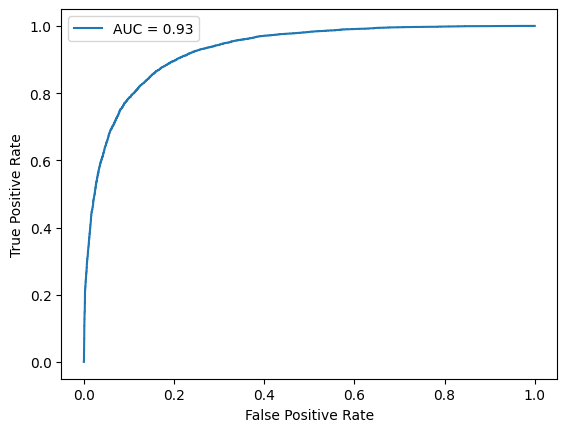

In [108]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1score = f1_score(y_test, y_pred, pos_label=1)

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve


# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1score)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [117]:
input_text = "terribly amazing movie"
language = langid.classify(input_text)[0]
if language == 'en':
  input_text = preprocess_review(input_text)
elif language == 'ar':
  input_text = preprocess_arabic_review(input_text)
tokenizer.fit_on_texts(input_text)
input_seq = tokenizer.texts_to_sequences([input_text])
input_padded = pad_sequences(input_seq, maxlen=max_len)
pred_score = model.predict(input_padded)
pred_sentiment = 1 if pred_score >= 0.5 else 0
if pred_sentiment == 1:
    print("The sentiment of the input text is positive")
else:
    print("The sentiment of the input text is negative")

1/1 [==============================] - 0s 146ms/step
The sentiment of the input text is positive
